<a href="https://colab.research.google.com/github/imranhassan87/NLP/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun May 10 11:04:53 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  !pip uninstall tb-nightly tensorboardX tensorboard
  !pip install tf-nightly
except Exception:
  pass

import tensorflow as tf

%load_ext tensorboard

Uninstalling tensorboard-2.2.1:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.6/dist-packages/tensorboard-2.2.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorboard/*
Proceed (y/n)? y
  Successfully uninstalled tensorboard-2.2.1
     |████████████████████████████████| 521.9MB 24kB/s 
     |████████████████████████████████| 3.0MB 38.8MB/s 
     |████████████████████████████████| 460kB 38.6MB/s 


In [3]:
print(tf.__version__)

2.2.0-dev20200508


In [4]:
import pkg_resources

for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
  print(entry_point.dist)

tensorboard 2.2.1
tensorboard-plugin-wit 1.6.0.post3


In [0]:
!rm -r /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info

In [6]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
import tensorflow_datasets as tfds

In [8]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', with_info=True)
train_dataset  = dataset['train']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incompleteAPIG8X/amazon_us_reviews-train.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [9]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [10]:
print(train_dataset)

<DatasetV1Adapter shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>


In [11]:
len(list(train_dataset))

104975

In [0]:
BUFFER_SIZE=3000
BATCH_SIZE=128 #using mini-batch GD

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

In [14]:
for reviews in train_dataset.take(2):
    print(reviews)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'30979973'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B00HWZGFAA'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'953244747'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'BoxWave BlueBridge Wireless Bluetooth Car Stereo Audio Adapter/Receiver (3.5mm Aux Input Jack) for Hands Free Music Streaming or Calling for All Apple, Samsung, Android Smartphones, Tablets, MP3 Players and More!'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'Use this in my car to play Pandora also works great as a speaker phone. I would buy another one for someone else definitely recommend it'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2015-02-05'>, 'review_he

In [15]:
for reviews in train_dataset.take(10):
    review_text=reviews['data']
    print(review_text.get('review_body').numpy())
    print(review_text.get('star_rating'))
    print(tf.where(review_text.get('star_rating')>3,1,0).numpy())

b'Use this in my car to play Pandora also works great as a speaker phone. I would buy another one for someone else definitely recommend it'
tf.Tensor(5, shape=(), dtype=int32)
1
b"This is my very first GPS system. I have always wanted one but when sales hit the wallet wasn't there to purchase. The one that I purchased was used. If you had laid one straight from the factory beside of mine it would be very hard to know which was which. The only problem that I had nothing major and that is there wasn't any directions that came with it. That wasn't a major issue, I learned by trial and error. The product works great and full fills all of my needs. I had never heard of the company before, but everything turned out good. Very easy to operate and see. The screen is very clear and very easy to see. My test drive with it went great. I drive a restored 92 Roadmaster and short cuts ease the gas consumption which is fantastic. I am fairly new to the area where I live and this saves a lot of time a

In [0]:
tokenizer = tfds.features.text.Tokenizer()

In [17]:
vocabulary_set = set() #set method removes all the duplicates
for _,reviews in train_dataset.enumerate():
    #printing reviews
    review_text=reviews['data']
    reviews_tokens=tokenizer.tokenize(review_text.get('review_body').numpy())
    vocabulary_set.update(reviews_tokens)

vocab_size = len(vocabulary_set)
vocab_size

73738

In [0]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

In [19]:
print(vocabulary_set)
print(len(vocabulary_set))


{'ANS', 'pooh', 'relace', '28s', 'chrger', 'mapquest', 'Linkyo', 'Progress', 'usandolo', 'RSE2', 'installazione', 'XPR', 'Encased', '905', 'pilotos', 'haha', 'interlocking', 'hag', 'Peaveys', 'carmel', 'looved', 'certificate', 'v1002', 'AudioTechnica', 'prepared', 'Godsend', 'carro', 'redwood', 'forklifts', 'aficionado', 'Write', '1975', 'ASS', 'dogonnit', 'rockfords', 'Pilot', 'execelent', 'MXL', 'thousands', 'possibilities', 'Ross', 'detachability', 'Aztak', 'cross', 'FP', 'Winnie', 'windshild', 'poer', 'replacementb', 'GERBER', 'Goodbye', 'Performas', 'articulated', 'GGGK', 'INALTERABLE', 'children', 'vacant', 'HHO', 'tightening', 'microcontrolers', 'RN013', 'noproblem', 'funtion', 'SB300ss', 'auto', 'juice', 'Fenwick', 'Bond', 'C580', 'Commercial', 'TotalMedia3', 'horribly', 'Chatted', 'Firefox', 'lightspeed', 'retractor', 'absurdity', 'pistons', 'miracles', '24hour', 'yust', 'longre', 'If', 'marking', 'oversight', 'FireWire', 'trance', 'scout', 'Footrest', 'Houstonian', 'impromptu

In [20]:
for reviews in train_dataset.take(5):
    review_text=reviews['data']
    print('\n')
    print(review_text.get('review_body').numpy())
    encoded_example = encoder.encode(review_text.get('review_body').numpy())
    print(encoded_example)



b'Use this in my car to play Pandora also works great as a speaker phone. I would buy another one for someone else definitely recommend it'
[18299, 71601, 70026, 45084, 40438, 70527, 27989, 44287, 8786, 26157, 32690, 32408, 65485, 54704, 13401, 69760, 52063, 22182, 41851, 8209, 44604, 72712, 7265, 4639, 1620, 17527]


b"This is my very first GPS system. I have always wanted one but when sales hit the wallet wasn't there to purchase. The one that I purchased was used. If you had laid one straight from the factory beside of mine it would be very hard to know which was which. The only problem that I had nothing major and that is there wasn't any directions that came with it. That wasn't a major issue, I learned by trial and error. The product works great and full fills all of my needs. I had never heard of the company before, but everything turned out good. Very easy to operate and see. The screen is very clear and very easy to see. My test drive with it went great. I drive a restored 9

In [21]:
for index in encoded_example:
    print('{} ---- {}'.format(index, encoder.decode([index])))

69760 ---- I
46455 ---- was
30052 ---- not
31634 ---- pleased
11972 ---- with
71601 ---- this
56778 ---- at
32427 ---- all
18528 ---- In
56711 ---- fact
1723 ---- the
15127 ---- seller
33090 ---- refunded
45084 ---- my
19763 ---- complete
23115 ---- purchase
42398 ---- price
40494 ---- which
69760 ---- I
40812 ---- liked
3385 ---- very
71557 ---- much
20019 ---- from
66649 ---- an
33138 ---- internet
19078 ---- supplier
5705 ---- It
56472 ---- didn
35331 ---- t
4283 ---- work
43891 ---- right
24429 ---- out
66534 ---- of
1723 ---- the
13280 ---- box
5705 ---- It
46455 ---- was
65485 ---- a
1512 ---- nice
62027 ---- looking
26610 ---- machine
14984 ---- and
65485 ---- a
47035 ---- shame
17527 ---- it
37132 ---- just
56472 ---- didn
35331 ---- t
57984 ---- do
12405 ---- good


In [0]:
def encode(text_tensor, label_tensor):
    encoded_text = encoder.encode(text_tensor.numpy())
    label = tf.where(label_tensor>=3,1,0)
    return encoded_text, label

In [0]:
def encode_map_fn(tensor):
    text = tensor['data'].get('review_body')
    label= tensor['data'].get('star_rating')
    
    encoded_text, label = tf.py_function(encode,inp=[text,label],Tout=(tf.int64,tf.int32))
    encoded_text.set_shape([None])
    label.set_shape([])
    
    return encoded_text, label

In [0]:
ar_encoded_data = train_dataset.map(encode_map_fn)

In [25]:
for t0,t1 in ar_encoded_data.take(2):
    print(t0)
    print(t1)

#here the encoded text and the label(0,1) will be printed

tf.Tensor(
[18299 71601 70026 45084 40438 70527 27989 44287  8786 26157 32690 32408
 65485 54704 13401 69760 52063 22182 41851  8209 44604 72712  7265  4639
  1620 17527], shape=(26,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[73391 47303 45084  3385  3230  8064   503 69760 41778 49176 21387  8209
  5229 72386 27052 44615  1723  9179 24398 35331 45598 70527 23115 47202
  8209 38764 69760 44318 46455 68937    83 49892 47452 59133  8209 23637
 20019  1723 21798 24518 66534 22230 17527 52063 35716  3385  3072 70527
  9060 40494 46455 40494 47202 12800 41421 38764 69760 47452  5938 28189
 14984 38764 47303 45598 24398 35331 31449 65413 38764 42747 11972 17527
  5049 24398 35331 65485 28189 12433 69760  5385 29536 12241 14984 69539
 47202 12256 26157 32690 14984 34383 48560 32427 66534 45084 23618 69760
 47452 35317 70633 66534  1723 57657  8688  5229 57923 53146 24429 12405
 58891 46100 70527  7937 14984 64600 47202 69982 47303  3385 61272 14984
  3385 46100 70527 64600 

In [0]:
TAKE_SIZE = 10000 #for the test_data

train_data = ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE) #take the maximum length in the batch data and padd others according to it

test_data = ar_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE) #in each batch padd with equal number of variables

#newer versions will also take padded_shapes as an arguement 
#padded_batch(BATCH_SIZE,padded_shapes = ([None],()))

In [0]:
vocab_size += 1 #add for the padded number in the vocab which is num=0

In [28]:
sample_text , sample_labels = next(iter(test_data))

sample_text[0], sample_labels[0]

(<tf.Tensor: shape=(383,), dtype=int64, numpy=
 array([18299, 71601, 70026, 45084, 40438, 70527, 27989, 44287,  8786,
        26157, 32690, 32408, 65485, 54704, 13401, 69760, 52063, 22182,
        41851,  8209, 44604, 72712,  7265,  4639,  1620, 17527,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  

In [29]:
for f0,f1 in test_data.take(10):
    print(tf.unique_with_counts(f1)[2].numpy()) #unique_with_counts has much info(0,1,2) here we are just taking the second index info and number to print the value


# shows the no of sentiments in batch [1(+ve),0(-ve)]

[95 33]
[30 98]
[94 34]
[97 31]
[32 96]
[102  26]
[94 34]
[100  28]
[34 94]
[102  26]


In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

for units in [64,64]:
    model.add(tf.keras.layers.Dense(units,activation="relu"))
    model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1))

In [0]:
!rm -r /tmp/logs/

In [0]:
import os
import datetime

logdir = os.path.join("/tmp/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="/tmp/sentiment_analysis.hdf5",verbose=1,save_best_only=True)

In [0]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [58]:
history = model.fit(train_data,epochs=5, validation_data=test_data,callbacks=[tensorboard_callback, checkpointer])

Epoch 1/5
  2/742 [..............................] - ETA: 14:37 - loss: 0.6871 - accuracy: 0.2500WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time. Check your callbacks.


742/742 [==============================] - ETA: 0s - loss: 0.3321 - accuracy: 0.8526
Epoch 00001: val_loss improved from inf to 0.38002, saving model to /tmp/sentiment_analysis.hdf5
742/742 [==============================] - 945s 1s/step - loss: 0.3321 - accuracy: 0.8526 - val_loss: 0.3800 - val_accuracy: 0.7582
Epoch 2/5
742/742 [==============================] - ETA: 0s - loss: 0.2501 - accuracy: 0.8945
Epoch 00002: val_loss improved from 0.38002 to 0.24471, saving model to /tmp/sentiment_analysis.hdf5
742/742 [==============================] - 956s 1s/step - loss: 0.2501 - accuracy: 0.8945 - val_loss: 0.2447 - val_accuracy: 0.8814
Epoch 3/5
742/742 [==============================] - ETA: 0s - loss: 0.1921 - accuracy: 0.9246
Epoch 00003: val_loss did not improve from 0.24471
742/742 [==============================] - 948s 1s/step - loss: 0.1921 - accuracy: 0.9246 - val_loss: 0.2639 - val_accuracy: 0.8990
Epoch 4/5
742/742 [==============================] - ETA: 0s - loss: 0.1577 - ac

In [79]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
model.save("/content/gdrive/My Drive/Final_Sentiment_Analysis.hdf5")

In [0]:
model.save('/tmp/final_sentiment_analysis.hdf5')

In [63]:
!ls -alrt /tmp/*.hdf5

-rw-r--r-- 1 root root 119845264 May 10 13:12 /tmp/sentiment_analysis.hdf5
-rw-r--r-- 1 root root 119845264 May 10 14:15 /tmp/final_sentiment_analysis.hdf5


In [65]:
eval_loss, eval_acc = model.evaluate(test_data)
print('\n Eval loss: {:.3f}, Eval accuracy: {:.3f}'.format(eval_loss, eval_acc))

79/79 [==============================] - 41s 519ms/step - loss: 0.2940 - accuracy: 0.8986

 Eval loss: 0.294, Eval accuracy: 0.899


In [66]:
for t0,t1 in test_data.take(1):
  print(t1)
  print(model.predict(t0))


tf.Tensor(
[1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0], shape=(128,), dtype=int32)
[[ 7.7491374 ]
 [ 4.1076374 ]
 [ 5.023327  ]
 [ 6.1456537 ]
 [ 3.656244  ]
 [ 0.631941  ]
 [ 3.063967  ]
 [ 5.39029   ]
 [ 4.6158705 ]
 [ 5.4431877 ]
 [ 5.537188  ]
 [-4.6757917 ]
 [ 4.1577625 ]
 [ 7.9837146 ]
 [ 6.048324  ]
 [-2.9729376 ]
 [ 6.5068727 ]
 [ 5.7687225 ]
 [-3.6935487 ]
 [-4.8499765 ]
 [ 3.080581  ]
 [ 6.997782  ]
 [ 5.141388  ]
 [-4.463747  ]
 [ 4.6289597 ]
 [-4.9902644 ]
 [ 1.2305192 ]
 [ 7.4726295 ]
 [ 8.105984  ]
 [-4.957586  ]
 [ 5.1465454 ]
 [ 4.612694  ]
 [-2.0508616 ]
 [ 2.4220688 ]
 [ 6.8782125 ]
 [ 7.9756904 ]
 [ 7.588762  ]
 [ 5.76934   ]
 [-1.4727631 ]
 [ 6.2718043 ]
 [ 4.3907857 ]
 [ 5.769788  ]
 [-4.6342077 ]
 [ 7.5943484 ]
 [ 4.8762026 ]
 [ 3.4799438 ]
 [-0.90084

In [67]:
model.layers

In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         9438592   
_________________________________________________________________
bidirectional_13 (Bidirectio (None, None, 256)         263168    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, None, 128)         164352    
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [0]:
#model.get_layer('embedding').output

In [69]:
!nvidia-smi

Sun May 10 14:23:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    80W / 149W |   8468MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import matplotlib.pyplot as plt

def plot_graph(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], "")
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()


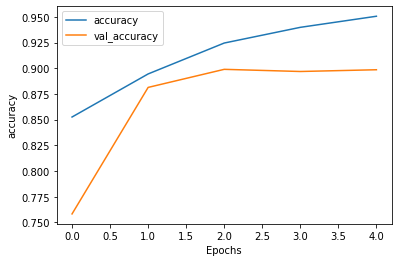

In [71]:
plot_graph(history,"accuracy")

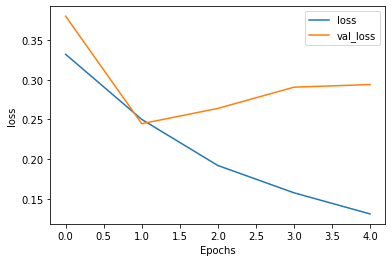

In [72]:
plot_graph(history,"loss")

In [0]:
#tf.keras.backend.clear_session()
sa_load = tf.keras.models.load_model('/tmp/final_sentiment_analysis.hdf5',compile=False)

In [0]:
def pad_to_size(vec, size):
  zeros = [0] * (size -len(vec))
  vec.extend(zeros)
  return vec

In [0]:
def predict_fn(pred_text):
  encoded_pred_text = encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text,100)
  print(encoded_pred_text)
  encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  predictions = sa_load.predict(tf.expand_dims(encoded_pred_text, 0))
  
  return predictions

In [76]:
pred_text = ("Doesn't meet expectations, it's not as long as shown in the photo or video and certainly not one size fits all. Arms are tight and just doesn't feel comfy")
predictions = predict_fn(pred_text)
print(predictions)


[37548, 35331, 39453, 21296, 17527, 19077, 30052, 32408, 13267, 32408, 44133, 70026, 1723, 19939, 14874, 50366, 14984, 5130, 30052, 8209, 56149, 15868, 32427, 36928, 46853, 51158, 14984, 37132, 53512, 35331, 20615, 25000]
[37548, 35331, 39453, 21296, 17527, 19077, 30052, 32408, 13267, 32408, 44133, 70026, 1723, 19939, 14874, 50366, 14984, 5130, 30052, 8209, 56149, 15868, 32427, 36928, 46853, 51158, 14984, 37132, 53512, 35331, 20615, 25000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-3.3842618]]


In [77]:
pred_text=("I purchased one husband. Yes, they look not exactly fashionable. However, they're amazingly soft and warm.but I'd happily snuggle into one indoors to combat the chill. :)")
predictions=predict_fn(pred_text)
print(predictions)

[69760, 44318, 8209, 48178, 42081, 50041, 25037, 30052, 46270, 26802, 58362, 50041, 4504, 44537, 67866, 14984, 2321, 5229, 69760, 14436, 26057, 39056, 2206, 8209, 10576, 70527, 37473, 1723, 33274]
[69760, 44318, 8209, 48178, 42081, 50041, 25037, 30052, 46270, 26802, 58362, 50041, 4504, 44537, 67866, 14984, 2321, 5229, 69760, 14436, 26057, 39056, 2206, 8209, 10576, 70527, 37473, 1723, 33274, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[4.4569635]]


In [78]:
pred_text=("And it might look better on taller people which, let's face it, is the majority of the adult population.All in all, I am quite satisfied with this purchase.")
predictions=predict_fn(pred_text)
print(predictions)

[24292, 17527, 18179, 25037, 13261, 57878, 31057, 73123, 40494, 39015, 19077, 20684, 17527, 47303, 1723, 53158, 66534, 1723, 33565, 47234, 4274, 70026, 32427, 69760, 17909, 23698, 36371, 11972, 71601, 23115]
[24292, 17527, 18179, 25037, 13261, 57878, 31057, 73123, 40494, 39015, 19077, 20684, 17527, 47303, 1723, 53158, 66534, 1723, 33565, 47234, 4274, 70026, 32427, 69760, 17909, 23698, 36371, 11972, 71601, 23115, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[2.5011854]]
